**Objective**

The objective of milestone-1 is to perform data preprocessing and EDA to understand customer churn. The output of milestone-1 will be used in milestones-2 and 3 to build machine learning models to predict customer churn and to create an interactive dashboard for decision making. In order to do that, follow the solution approach given in the capstone project overview and use the learners file for milestone-1 to answer the business questions.

## Let us start by importing the required libraries 

In [1]:
# Import the libraries

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Import the data  

In [2]:
# Read the data
df = pd.read_csv('milestone1_dataset.csv')

## Data Understanding 

### Write a code to display the first and last 5 rows of the dataset. 

In [3]:
# Show first 5 rows 
df.head(5) 

# alternative is to simply use "df" which will show us first and last 5 rows simultaneously

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Show last 5 rows of dataset
df.tail(5)

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
6494,4310-KEDTB,0,0,No,Yes,26,No,No phone service,DSL,No,...,Yes,No,No,No,Month-to-month,Yes,Mailed check,29.80,786.50,No
6495,7254-IQWOZ,1,0,No,No,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.65,69.65,Yes
6496,2474-BRUCM,1,1,Yes,No,40,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,No,Electronic check,101.85,4086.30,Yes
6497,4062-HBMOS,1,0,No,No,52,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.05,5364.80,No
6498,0742-NXBGR,0,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.30,82.30,Yes


### How many rows and columns are present in the data? 

In [5]:
# Print the response
print('The df contains',df.shape[0],'rows and',df.shape[1],'columns')

The df contains 6499 rows and 21 columns


### What are the datatypes of the different columns in the dataset?

In [6]:
# Show info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6499 non-null   object 
 1   Gender             6499 non-null   int64  
 2   Senior_Citizen     6499 non-null   int64  
 3   Partner            6499 non-null   object 
 4   Dependents         6499 non-null   object 
 5   Tenure             6499 non-null   int64  
 6   Phone_Service      6499 non-null   object 
 7   Multiple_Lines     6499 non-null   object 
 8   Internet_Service   6499 non-null   object 
 9   Online_Security    6499 non-null   object 
 10  Online_Backup      6499 non-null   object 
 11  Device_Protection  6499 non-null   object 
 12  Tech_Support       6499 non-null   object 
 13  Streaming_TV       6499 non-null   object 
 14  Streaming_Movies   6499 non-null   object 
 15  Contract           6499 non-null   object 
 16  Paperless_Billing  6499 

Write down the observations as per the information provided by running the above code.

- There are columns of various types: 2 float, 3 int and 16 object (string) types
- There is a discrepency : (1) all objects columns are categories in a data dictionary; 
- Note also that the dictionary shows Dtype of  gender and Senior citizen as category but at the same type represents them as 1 or 0 (int). So it seems having our df with Gender and Senior_citizen as int is rather correct. 
- Partner, dependants, Phone_Service etc have an object type (like yes/no) which can be easily transformed to int type later (for building ML)
- Each column (except Total_charges) has 6499 values which corresponds to the number of entries. Total_charges, having 6490, should be checked for missing values. 
- It seems that there is no Dtype issues (when numerical column has object Dtype)

### Correct the datatype of those columns which are not correct. Also, convert all object datatype columns into category datatypes.

In [7]:
# Convert all object datatype columns into category datatypes
for feature in df.columns: # Loop through all columns in the dataframe
    if df[feature].dtype == 'object': # Only apply for columns with object 
        df[feature] = pd.Categorical(df[feature])# Replace strings with an integer
df.info() # show the info summury

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6499 entries, 0 to 6498
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CustomerID         6499 non-null   category
 1   Gender             6499 non-null   int64   
 2   Senior_Citizen     6499 non-null   int64   
 3   Partner            6499 non-null   category
 4   Dependents         6499 non-null   category
 5   Tenure             6499 non-null   int64   
 6   Phone_Service      6499 non-null   category
 7   Multiple_Lines     6499 non-null   category
 8   Internet_Service   6499 non-null   category
 9   Online_Security    6499 non-null   category
 10  Online_Backup      6499 non-null   category
 11  Device_Protection  6499 non-null   category
 12  Tech_Support       6499 non-null   category
 13  Streaming_TV       6499 non-null   category
 14  Streaming_Movies   6499 non-null   category
 15  Contract           6499 non-null   category
 16  Paperl

### Check the statistical summary of the data 

In [8]:
# Write the code here
df.describe(include='all')

,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
count,6499,6499.000000,6499.000000,6499,6499,6499.000000,6499,6499,6499,6499,...,6499,6499,6499,6499,6499,6499,6499,6499.000000,6490.000000,6499
unique,6499,NaN,NaN,2,2,NaN,2,3,4,3,...,3,3,3,3,3,2,4,NaN,NaN,2
top,0002-ORFBO,NaN,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,NaN,No
freq,1,NaN,NaN,3359,4561,NaN,5884,3138,2856,3208,...,2843,3209,2589,2555,3576,3836,2182,NaN,NaN,4784
mean,NaN,0.506232,0.162487,NaN,NaN,32.369134,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.733344,2282.935177,NaN
std,NaN,0.500000,0.368925,NaN,NaN,24.584693,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.136193,2270.034922,NaN
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000,NaN
25%,NaN,0.000000,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.400000,399.300000,NaN
50%,NaN,1.000000,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.100000,NaN
75%,NaN,1.000000,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3786.612500,NaN


Write down the observations after running the above code.

- Preliminary, most of our customers do not have a partner (Freq of No is 3359)
- Preliminary, most of our customers do not have dependents (Freq of No is 4561)
- In average, customers remain with company 32 months (std 24 months) while median is 29 months. As median is not equal to mean, it seems that there is a skewness in data. The longest tenure is 72 months.
- Preliminary, most of customers use phone service (Freq of Yes is 5884)
- Preliminary, the largest group of customers do not have  multiple lines (Freq of No is 3138)
- Preliminary, the largest group of customers, who use internet service, uses them via fiber optic (Freq of Fiber Optic is 2856)
- Preliminary, the most of our customers, who use internet service, do not have an online security (Freq of No is 3208)
- Preliminary, most of our customers, who use internet service, do not have a device protection (Freq of No is 2843)
- Preliminary, most of our customers, who use internet service, do not have a tech support (Freq of No is 3209)
- Preliminary, most of our customers, who use internet service, do not have a streaming TV(Freq of No is 2589)
- Preliminary, most of our customers, who use internet service, do not have a streaming movie(Freq of No is 2555)
- Preliminary, most of our customers are on month-to-month contracts(Freq of Month-to-month is 3576)
- Preliminary, most of our customers have a paperless billing (Freq of yes is 3836)
- Preliminary, most of our customers use a electronic check as a payment method(Freq of electronic check is 2182)

- In average, monthly charges reach 64.73 usd  with std 30 usd (units are not given, let it be in USD. Note that median is 70.3 usd which is higher than mean (skewness of data?) The lowest monthly charge is 18.25 usd and the highest charge is 118 usd. 
- In average, total charges reach 2283 usd with std 2270 usd (note that std is comparable with mean).Note also that median is 1397, which is a much lower than mean (skewness of data?). This requies an additional investigation, especially considering the opposite trend in monthly charges (there, median was higher than mean. Does it tells us that customers consider the prices as high and that is why leave? (keep in mind this hypothesis).
The lowest total charge is 18.80 usd and the highest charge is 8684 usd. 

- Most of customers did not churn (Freq of No is 4784). 

## Data Preprocessing 

### Check for duplicate entries in the data 

In [9]:
# Find the duplicate rows 
duplicate = df[df.duplicated()]

# Print the resultant Dataframe
print("Duplicate Rows :",duplicate)

Duplicate Rows : Empty DataFrame
Columns: [CustomerID, Gender, Senior_Citizen, Partner, Dependents, Tenure, Phone_Service, Multiple_Lines, Internet_Service, Online_Security, Online_Backup, Device_Protection, Tech_Support, Streaming_TV, Streaming_Movies, Contract, Paperless_Billing, Payment_Method, Monthly_Charges, Total_Charges, Churn]
Index: []

[0 rows x 21 columns]


- No dublicated rows are identified in dataframe

### Check if any discrepancy is present in the categorical column values.

In [10]:
# Checking if there are any excessive unique values 
df.nunique()

CustomerID           6499
Gender                  2
Senior_Citizen          2
Partner                 2
Dependents              2
Tenure                 73
Phone_Service           2
Multiple_Lines          3
Internet_Service        4
Online_Security         3
Online_Backup           3
Device_Protection       3
Tech_Support            3
Streaming_TV            3
Streaming_Movies        3
Contract                3
Paperless_Billing       2
Payment_Method          4
Monthly_Charges      1554
Total_Charges        6046
Churn                   2
dtype: int64

* All categorical columns (except internet service) has the excepted number of unique values (according to dictionary). 
* According to dictionary, the Internet service has only 3 unique values: DSL, Fiber optic and No. However, we can see that 4 unique numbers are present in this column. So let us check it in details

#### Replace the incorrect value with the correct value in the categorical column

In [11]:
# Checking the number of unique values 
df['Internet_Service'].value_counts()

Fiber optic    2856
DSL            2217
No             1422
Fiber-optic       4
Name: Internet_Service, dtype: int64

* Fiber optic is also present as Fiber-optic in df so let us replace it 

In [12]:
# Replace Fiber-optic by Fiber optic
df['Internet_Service'].replace(['Fiber-optic'],['Fiber optic'],inplace=True)
# Check again the unique values
df['Internet_Service'].value_counts()

Fiber optic    2860
DSL            2217
No             1422
Name: Internet_Service, dtype: int64

* As expected, Fiber-optic is not present anymore and combined under Fiber Optic 

### Are there any missing values in the data? If so, treat them using an appropriate method.

In [13]:
# Checking the missing values 
df.isnull().sum()

CustomerID           0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        9
Churn                0
dtype: int64

* Total_Charges has 9 missing values

In [14]:
# Let us see rows with these missing values
df[df['Total_Charges'].isna()]


,CustomerID,Gender,Senior_Citizen,Partner,Dependents,Tenure,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,...,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn
488,4472-LVYGI,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,1,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,0,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,0,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,1,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,0,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,1,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No


* Note that Tenure for all missing values is 0 (this info will be used later in a note section) 

#### Let's try to fill in the missing value with the median value of the column.

In [15]:
# Filling the missing values with medians 
df['Total_Charges'] = df['Total_Charges'].fillna(df['Total_Charges'].median())

# Checking the missing values 
df.isnull().sum()

CustomerID           0
Gender               0
Senior_Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone_Service        0
Multiple_Lines       0
Internet_Service     0
Online_Security      0
Online_Backup        0
Device_Protection    0
Tech_Support         0
Streaming_TV         0
Streaming_Movies     0
Contract             0
Paperless_Billing    0
Payment_Method       0
Monthly_Charges      0
Total_Charges        0
Churn                0
dtype: int64

Note: we were asked to replace the missing values with medians. However, it may be better replacing the missing values with zeros or with Monthly_charges because tenure (in months) is 0 so total charges should not be greater than monthly bill (assuming no other charges were present). Anyway, we will keep replacing the missing values with medians as requested in the task

##### Now, after handling the missing values and also checking the data types, let's visualise the dataset.

##  Data Visualization 

In addition to the observations, perform each of the five relevant univariate and bivariate analyses of different columns with the help of the below functions.

### Univariate Analysis  



Before doing the visualization, please run the below codes:

In [16]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [17]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [18]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Do the univariate analysis of different integer and categorical variables and write down the observations. 
Hint: Plot different visualizations using the above function

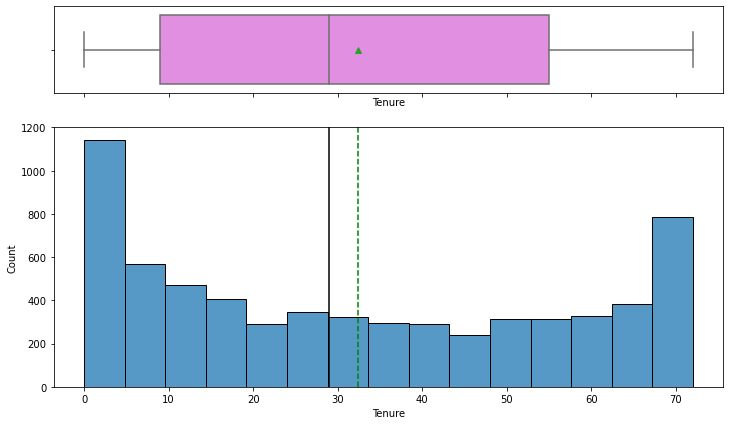

In [20]:
# Histogram of Tenure
histogram_boxplot(df,'Tenure')

Observations:
-  In average, our customers are around 33 years whereas median value is a just little below 30 years. Mean tenure (the green line)  is higher than the median tenure. Thus, the data is righ skewed (as it also seen on histogram).

- Two distinct bars are seen: (1) Tenure is below 5 months (the most left bar) and (2)Tenure is 70 months (the rightest bar). So we have around 1150 customers from group 1 who quickly abandoned (chunned?) our company. At the same time, around 800 customers remain with company a long time. In future analysis, it may be valuable to understand common features of each group.  

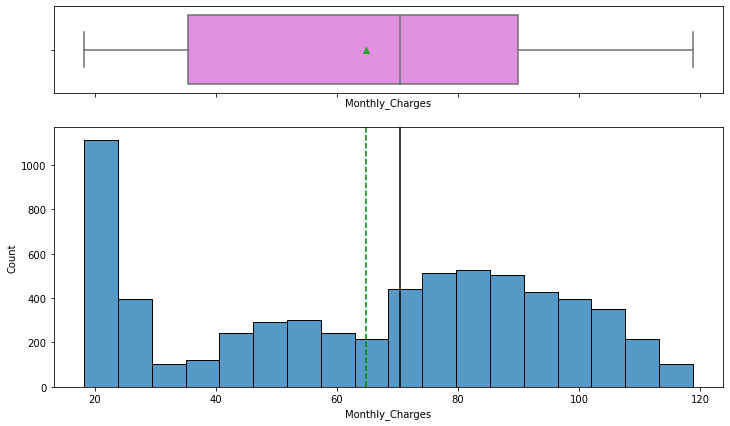

In [21]:
# Histogram of Tenure
histogram_boxplot(df,'Monthly_Charges')

Observations:
- The mean monthly charge is around 65 and the median is about 70. 

- The most numbered group (the left bar with around 1100 customers) has monthly charge equal or below 20 

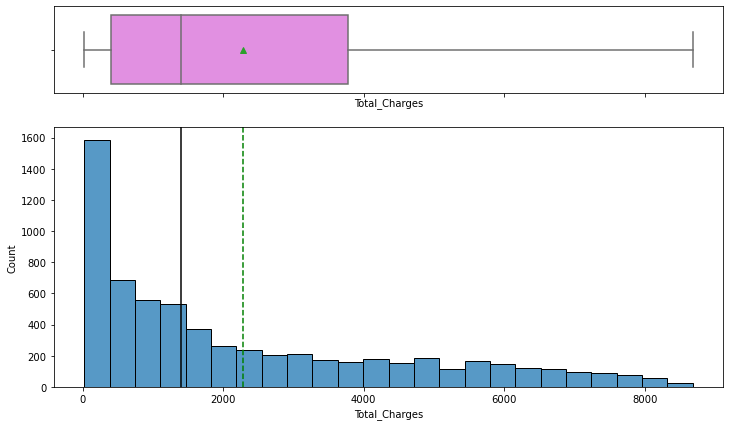

In [22]:
# Histogram of Tenure
histogram_boxplot(df,'Total_Charges')

Observations:
- Mean total charges is a little bit higher than 2000 whereas median is roughly about 1500. The data is right skewed

- The left bar has the highest count i.e. the most people bear low charges  and probably churn

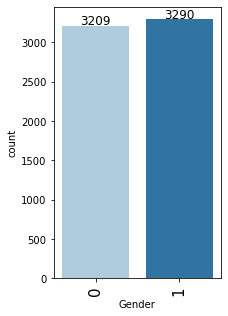

In [23]:
labeled_barplot(df,'Gender')

* There is approximatevely the same number of men and women

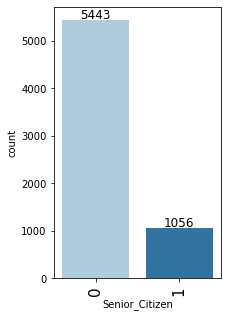

In [24]:
labeled_barplot(df,'Senior_Citizen')

* Most of our customers are not senior citizens (5443 against 1056)

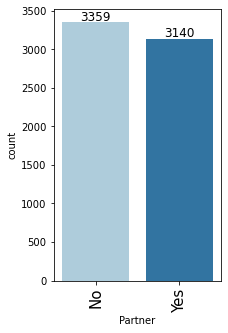

In [25]:
labeled_barplot(df,'Partner')

* 51 % of our customers do not have partner. So, approximatevely, the same share of customers has the partner 

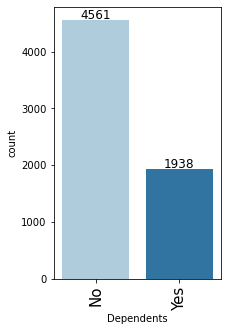

In [26]:
labeled_barplot(df,'Dependents')

* Around 70% of our customers do not have dependents. However, 30 % of customers, which is also significant number, have dependents

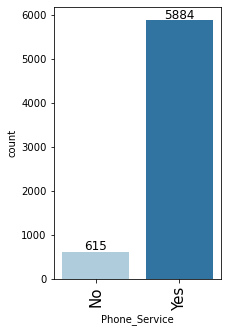

In [27]:
labeled_barplot(df,'Phone_Service')

* 90% of customers have a phone service

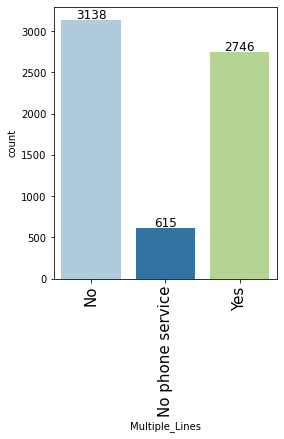

In [28]:
labeled_barplot(df,'Multiple_Lines')

* Among those who use phone service, 53% have only 1 line. 47% have multiple lines

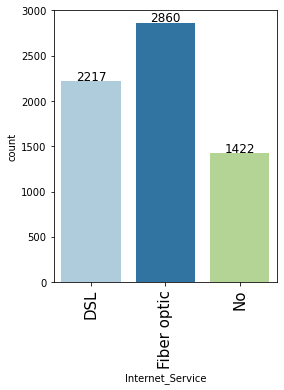

In [29]:
labeled_barplot(df,'Internet_Service')

- Most of internet service is ensured via fiber optic. The remaining (also significant) part is ensured by DSL.
- 22 % of customers do not have internet service  

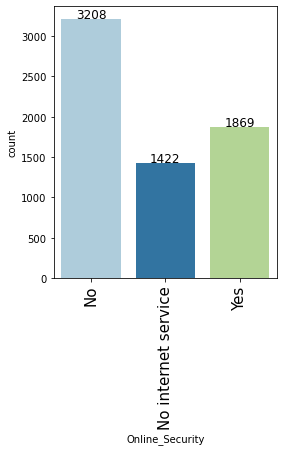

In [30]:
labeled_barplot(df,'Online_Security')

* Among those who use internet service, 63% of customers do not have online security

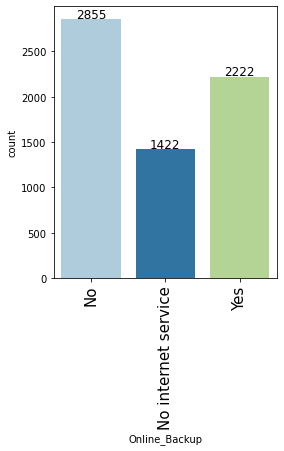

In [31]:
labeled_barplot(df,'Online_Backup')

* Among those who use internet service, 56% of customers do not have online backup (but less than online security)

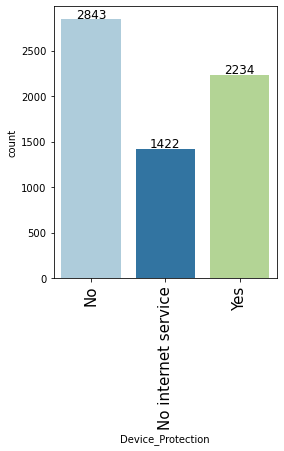

In [32]:
labeled_barplot(df,'Device_Protection')

* Among those who use internet service, 56% of customers do not have device protection 

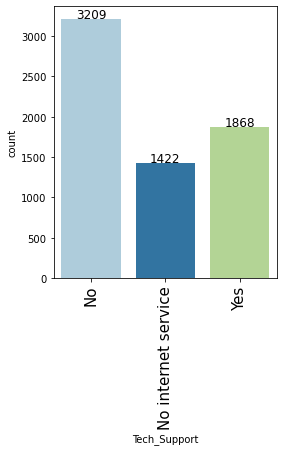

In [33]:
labeled_barplot(df,'Tech_Support')

* Among those who use internet service, 63% of customers do not have a tech support 

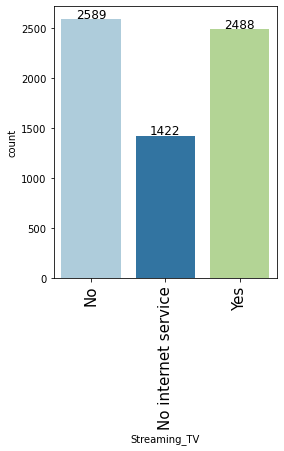

In [34]:
labeled_barplot(df,'Streaming_TV')

* Among those who use internet service, 51 % of customers do not have a streaming TV

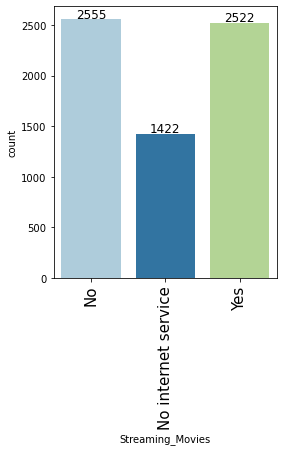

In [35]:
labeled_barplot(df,'Streaming_Movies')

* Among those who use internet service, 50 % of customers do not have a streaming movies

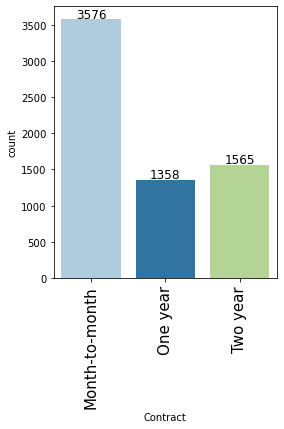

In [36]:
labeled_barplot(df,'Contract')

* 55% of all customers have month-to-month contracts. 21 % of all customers have one-year contracts and 24% of customers have two-year contracts

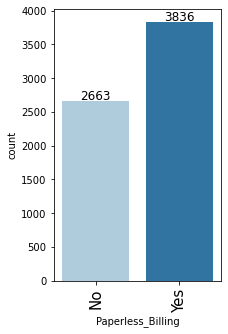

In [37]:
labeled_barplot(df,'Paperless_Billing')

* Most of customers (59%) use a paperless billing 

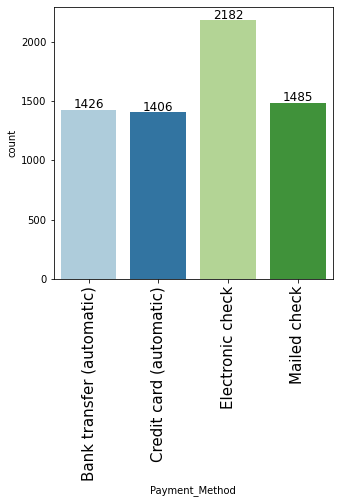

In [38]:
labeled_barplot(df,'Payment_Method')

* Electronic check is the most popular payment method (33.6%). The remaining % are almost equally distributed among other methods 

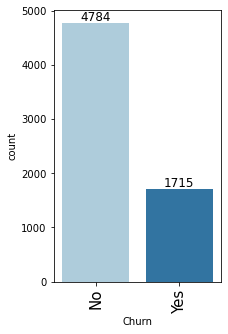

In [39]:
labeled_barplot(df,'Churn')

* Most of customers in database did not churn (74% against 26% who did churn)


### Bivariate Analysis 

#### Plot the heatmap.

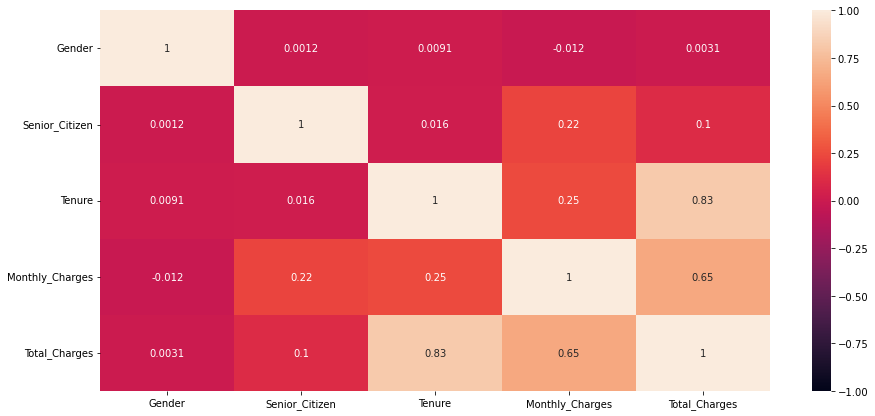

In [40]:
#  Plot a heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(),
            annot=True,
            vmin=-1,
            vmax=1);

plt.show()

* Only numeric columns were analysed. 

* There is a moderate high correlation (0.65) between monthly charges and total charges as weel as relatively high correlation (0.83) between tenure and total charges 

#### Do the bivariate analysis between column name - "Churn" and different integer and categorical variables and write down the observations. 
Hint: Plot different visualizations using the above function

Churn     No   Yes   All
Gender                  
All     4784  1715  6499
0       2347   862  3209
1       2437   853  3290
------------------------------------------------------------------------------------------------------------------------


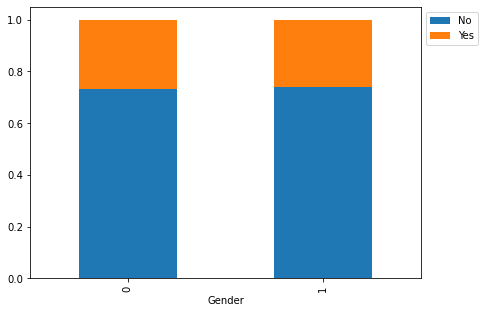

In [41]:
stacked_barplot(df, 'Gender', 'Churn')


* There is approximately the same proportion of churned clients (36%) among women and mens

Churn             No   Yes   All
Senior_Citizen                  
All             4784  1715  6499
0               4163  1280  5443
1                621   435  1056
------------------------------------------------------------------------------------------------------------------------


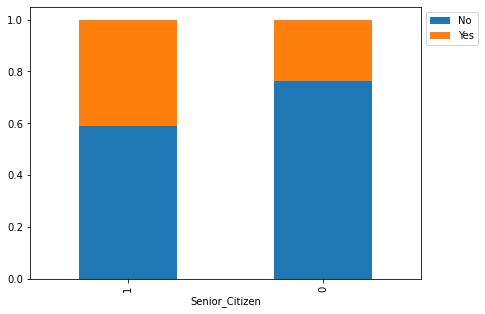

In [42]:
stacked_barplot(df, 'Senior_Citizen', 'Churn')


* Among senior citizens, the share of churned clients is higher than non seniors (41% against 23.5%)

Churn      No   Yes   All
Partner                  
All      4784  1715  6499
No       2260  1099  3359
Yes      2524   616  3140
------------------------------------------------------------------------------------------------------------------------


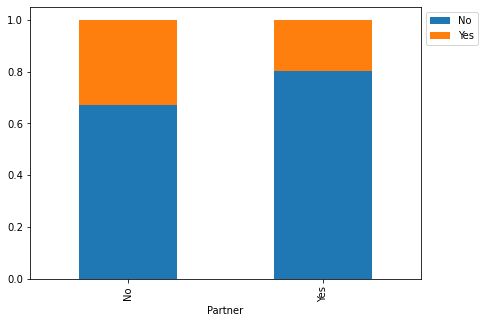

In [43]:
stacked_barplot(df, 'Partner', 'Churn')


* The share of churned clients among people who does not have a partner is higher than those who has a partner (33% against 20%)

Churn         No   Yes   All
Dependents                  
All         4784  1715  6499
No          3144  1417  4561
Yes         1640   298  1938
------------------------------------------------------------------------------------------------------------------------


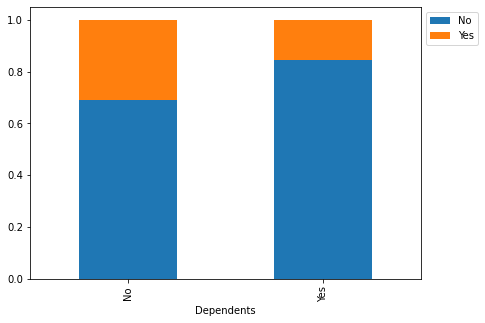

In [44]:
stacked_barplot(df, 'Dependents', 'Churn')


* The share of churned clients among people who does not have dependents is higher than those who have them (31% against 15%)

Churn     No   Yes   All
Tenure                  
All     4784  1715  6499
1        221   350   571
2        108   113   221
3         98    81   179
4         87    76   163
...      ...   ...   ...
62        59     5    64
45        51     5    56
63        60     4    64
64        70     2    72
0          9     0     9

[74 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


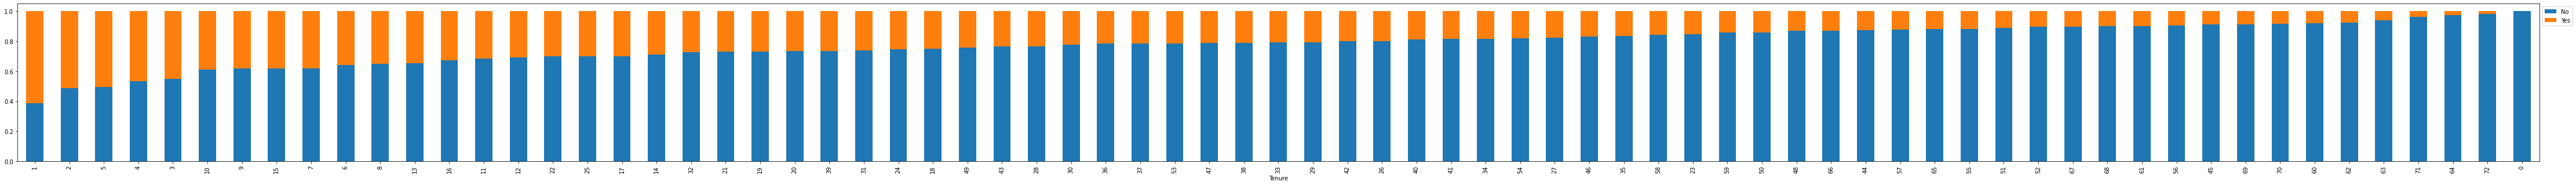

In [45]:
stacked_barplot(df, 'Tenure', 'Churn')


* In general, the share of churned customers among the tenures with few months is higher than for long-lasting tenures

Churn            No   Yes   All
Phone_Service                  
All            4784  1715  6499
Yes            4323  1561  5884
No              461   154   615
------------------------------------------------------------------------------------------------------------------------


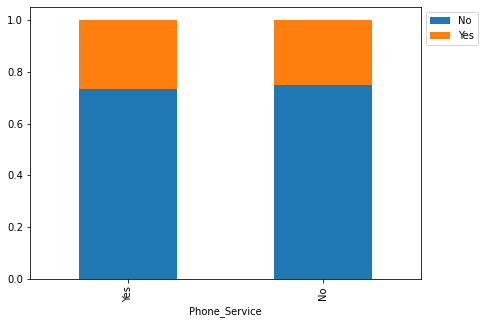

In [46]:
stacked_barplot(df, 'Phone_Service', 'Churn')

* The same proportion of churned customers exist among people having  a phone service and those who does not

Churn               No   Yes   All
Multiple_Lines                    
All               4784  1715  6499
No                2352   786  3138
Yes               1971   775  2746
No phone service   461   154   615
------------------------------------------------------------------------------------------------------------------------


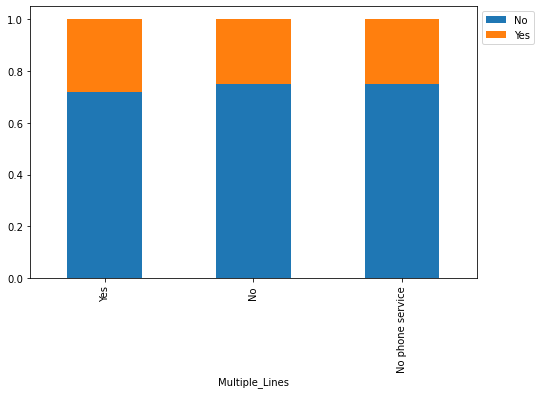

In [47]:
stacked_barplot(df, 'Multiple_Lines', 'Churn')

* Approximately, the same proportions of churned customers is present (for the criterion of multiple lines)

Churn               No   Yes   All
Internet_Service                  
All               4784  1715  6499
Fiber optic       1668  1192  2860
DSL               1802   415  2217
No                1314   108  1422
------------------------------------------------------------------------------------------------------------------------


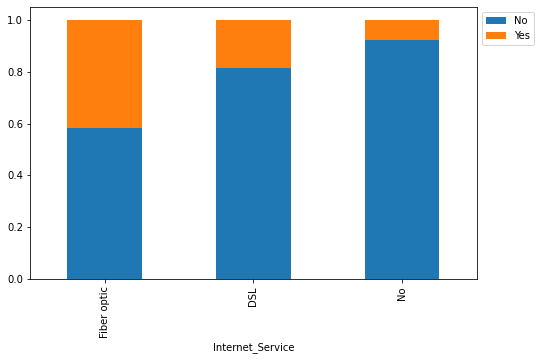

In [48]:
stacked_barplot(df, 'Internet_Service', 'Churn') 

* There is a high proportion of churned customers for fiber optic (42%). For DSL users, only 19% of churned customers exist. For people who does not use internet service the churned customers repsent only 7.5%

Churn                  No   Yes   All
Online_Security                      
All                  4784  1715  6499
No                   1872  1336  3208
Yes                  1598   271  1869
No internet service  1314   108  1422
------------------------------------------------------------------------------------------------------------------------


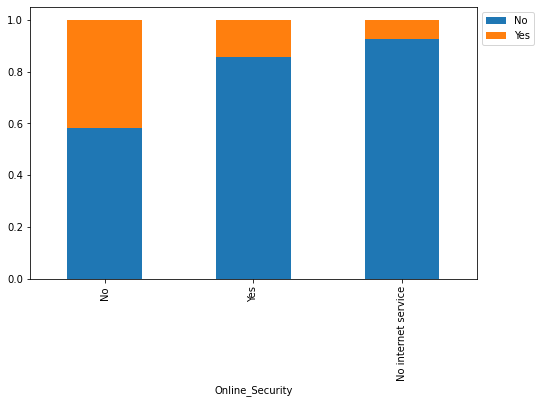

In [49]:
stacked_barplot(df, 'Online_Security', 'Churn') 

* Among customers who opted in for interner service, the share of churned clients is higher if there is no online security (42% against 14%)

Churn                  No   Yes   All
Online_Backup                        
All                  4784  1715  6499
No                   1726  1129  2855
Yes                  1744   478  2222
No internet service  1314   108  1422
------------------------------------------------------------------------------------------------------------------------


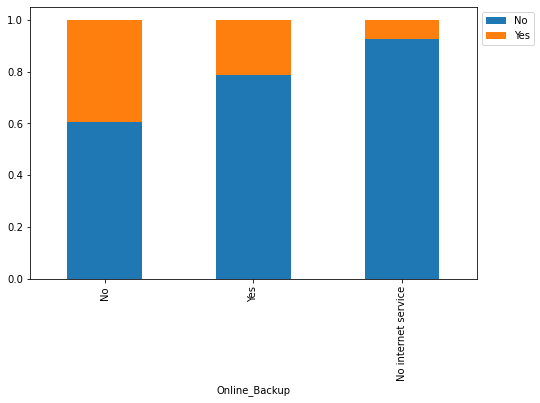

In [50]:
stacked_barplot(df, 'Online_Backup', 'Churn') 

* Among customers who opted in for interner service, the share of churned clients is higher if there is no online backup (40% against 22%)

Churn                  No   Yes   All
Device_Protection                    
All                  4784  1715  6499
No                   1738  1105  2843
Yes                  1732   502  2234
No internet service  1314   108  1422
------------------------------------------------------------------------------------------------------------------------


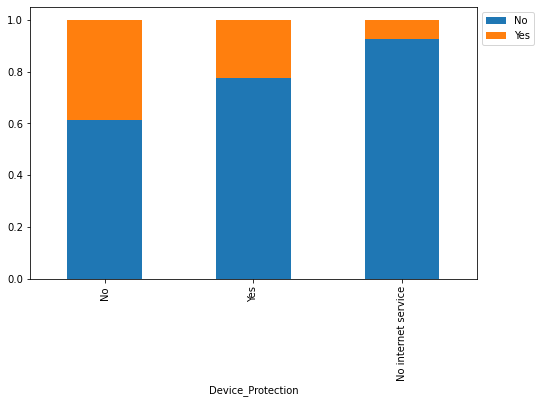

In [51]:
stacked_barplot(df, 'Device_Protection', 'Churn') 

* Among customers who opted in for interner service, the share of churned clients is higher if there is no a device protection (39% against 22%)

Churn                  No   Yes   All
Tech_Support                         
All                  4784  1715  6499
No                   1880  1329  3209
Yes                  1590   278  1868
No internet service  1314   108  1422
------------------------------------------------------------------------------------------------------------------------


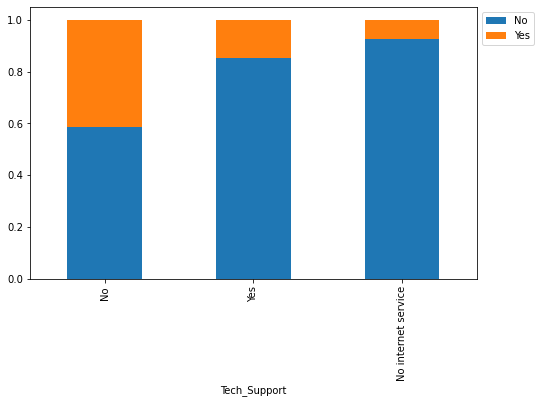

In [52]:
stacked_barplot(df, 'Tech_Support', 'Churn') 

* Among customers who opted in for interner service, the share of churned clients is higher if there is no a tech support (41% against 15%)

Churn                  No   Yes   All
Streaming_TV                         
All                  4784  1715  6499
No                   1734   855  2589
Yes                  1736   752  2488
No internet service  1314   108  1422
------------------------------------------------------------------------------------------------------------------------


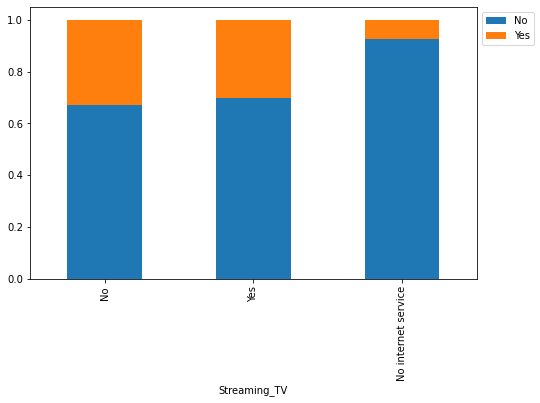

In [53]:
stacked_barplot(df, 'Streaming_TV', 'Churn') 

* There is no significant difference in churned customers for having or not streaming TV. In both group(yes/no) the share of churned customers is aproximately 33%

Churn                  No   Yes   All
Streaming_Movies                     
All                  4784  1715  6499
No                   1702   853  2555
Yes                  1768   754  2522
No internet service  1314   108  1422
------------------------------------------------------------------------------------------------------------------------


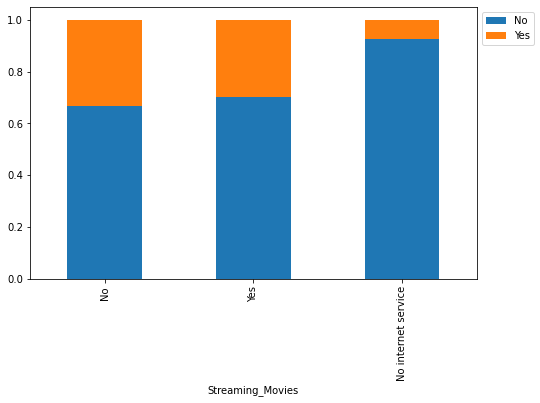

In [54]:
stacked_barplot(df, 'Streaming_Movies', 'Churn') 

* There is no significant difference in churned customers for having or not streaming movies. In both group(yes/no) the share of churned customers is aproximately 33%

Churn             No   Yes   All
Contract                        
All             4784  1715  6499
Month-to-month  2056  1520  3576
One year        1206   152  1358
Two year        1522    43  1565
------------------------------------------------------------------------------------------------------------------------


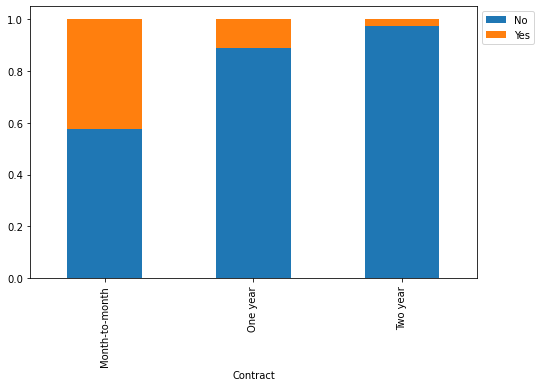

In [55]:
stacked_barplot(df, 'Contract', 'Churn') 

* The share of churned customers is much greated among customers having month-to-month contracts: 42.5 % against 11 % for 1-year contract and  3% for 2-year contracts

Churn                No   Yes   All
Paperless_Billing                  
All                4784  1715  6499
Yes                2547  1289  3836
No                 2237   426  2663
------------------------------------------------------------------------------------------------------------------------


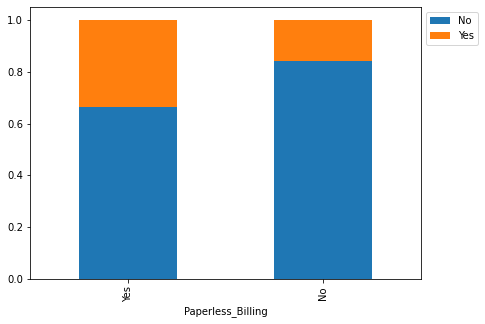

In [56]:
stacked_barplot(df, 'Paperless_Billing', 'Churn') 

* The share of churned customers, using paperless billing is 2 times greater than among those who does not use it: 34% against 16% 

Churn                        No   Yes   All
Payment_Method                             
All                        4784  1715  6499
Electronic check           1194   988  2182
Mailed check               1200   285  1485
Bank transfer (automatic)  1192   234  1426
Credit card (automatic)    1198   208  1406
------------------------------------------------------------------------------------------------------------------------


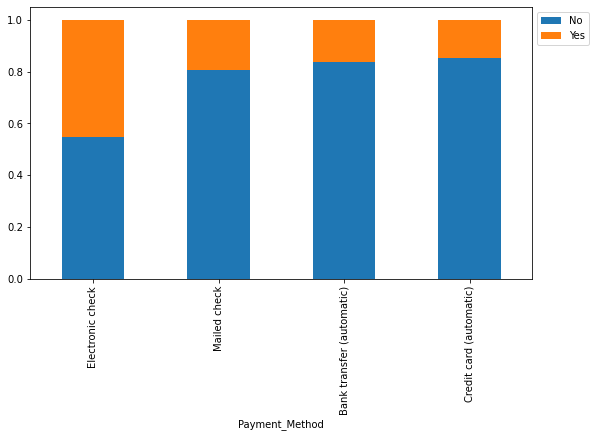

In [57]:
stacked_barplot(df, 'Payment_Method', 'Churn') 

* The share of churned customers, is the highest for electronic checks (45%) 

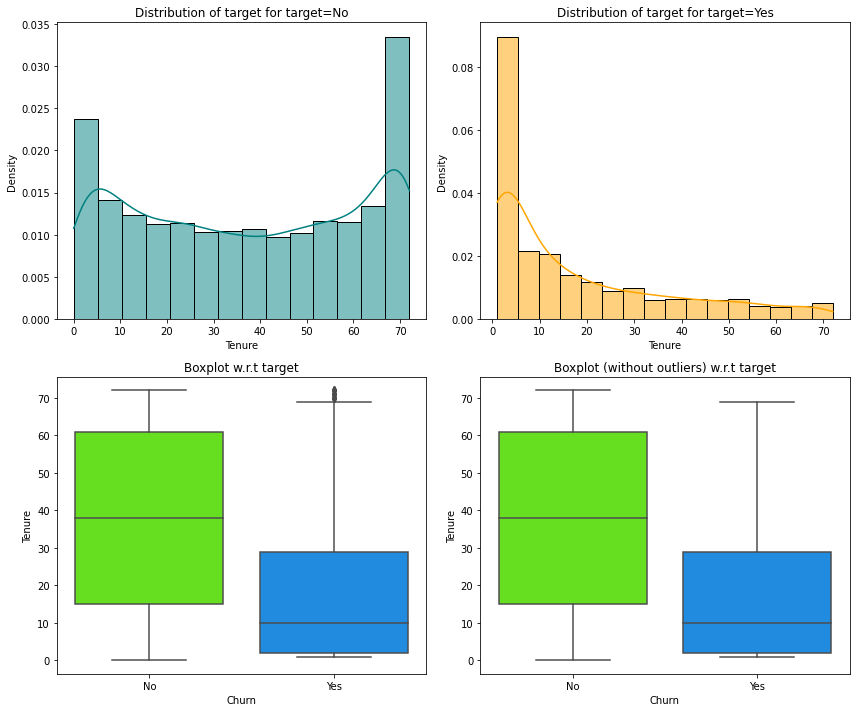

In [58]:
distribution_plot_wrt_target(df, 'Tenure', 'Churn')

- On boxplots, we see that there is a distinct difference between churned customers and not-churned. For instance, the median tenure for non-churned customers is around 40 months and  the median tenure for churned is about 10 months.
- Interquartile range for non-churned customers is much larger (between 15 months and 60 months) whereas for churned customer it is between 5 months and 30 months.
- Distribution of tenure for each subgroup(churned or not churned) is distinct. It is clearly seen that the number of churned customers reduces as tenure increases (the right upper plot). The distribution of non-churned customers looks more like a bathtub curve (with a peaks at the beginning and at the end)

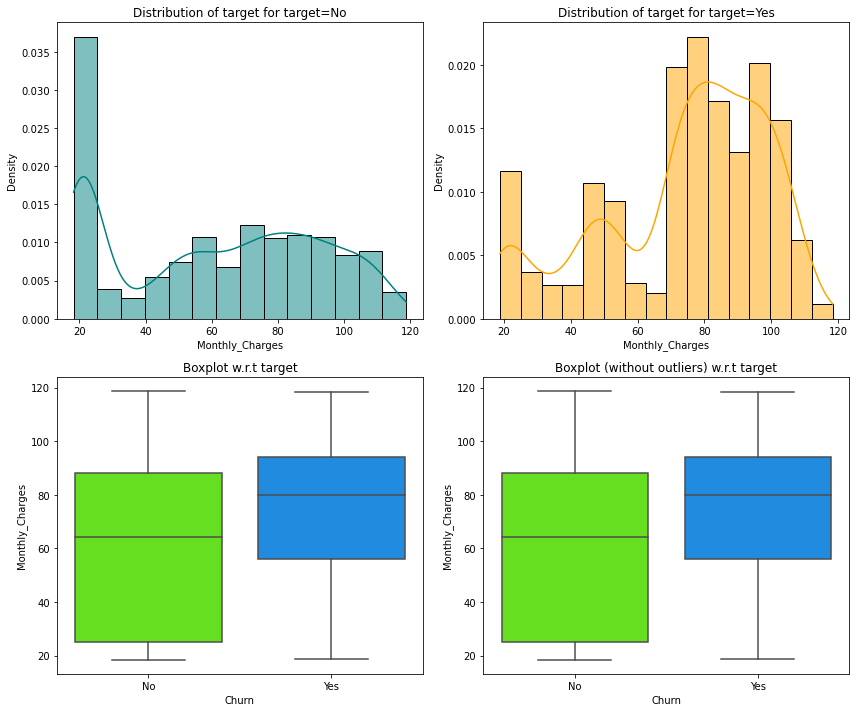

In [59]:
distribution_plot_wrt_target(df, 'Monthly_Charges', 'Churn')

* On boxplots, we see that medians of monthly charges among churned customers is greater than among non-churned customers (65 usd against 80 usd).Moreover, Interquatile interval of each group is also different. For non-churned customers IQR is between 25 and 90. For churned customers IQR is between 60 and 95. The same could be seen at distribution (churned vs non-churned customers). All these observations could mean that the people are leaving because of high monthly charges (as a hypothesis) 



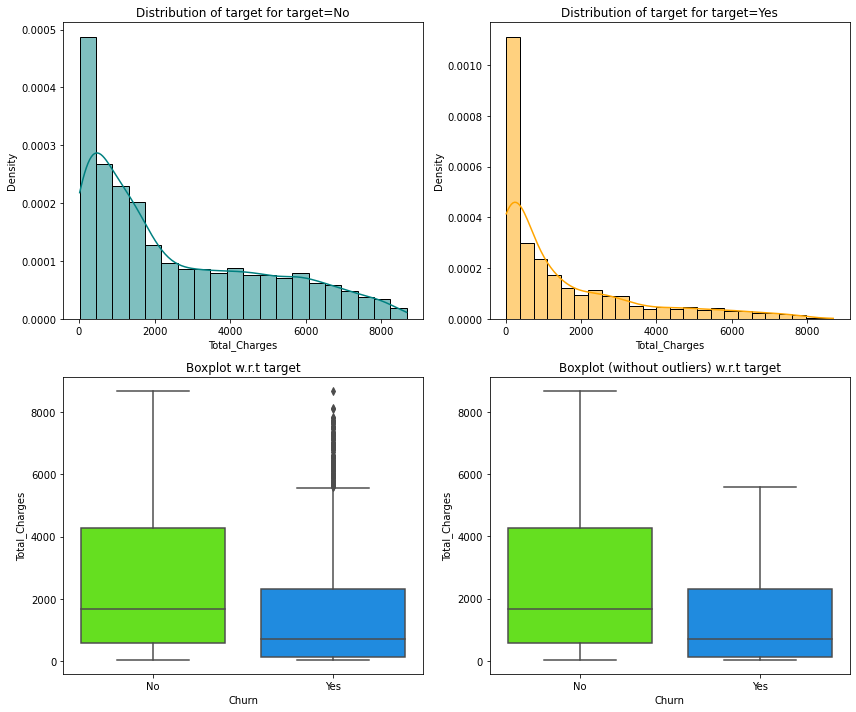

In [60]:
distribution_plot_wrt_target(df, 'Total_Charges', 'Churn')

* As a result (see our discussions above), churned customers do not contribute to total charges, which is seen from distributions (bars for churned customers are lower than for non-churned).  

* So it seems increased monthly charges do NOT lead to increase of total charges because  customers leave due to (probably) more attrative offers from competitors

## Answering business questions  

##### [Q1] - Display a table to show the relationship between contracts and payment method and write down the observations.

In [61]:
# Using crosstab to find the answer
pd.crosstab(index=df['Contract'],columns=df['Payment_Method'])


Payment_Method,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Contract,,,,
Month-to-month,542,498,1707,829
One year,357,370,321,310
Two year,527,538,154,346


* Bank transfers and credit cards are approximately equally distirbuted against contract types. 

* However, electronic check and mail check are rather associated to month-to month contracts

##### [Q2] - Display a table to show the relationship between payment and internet service and write down the observations.

In [62]:
# Using crosstab to find the answer
pd.crosstab(index=df['Internet_Service'],columns=df['Payment_Method'])


Payment_Method,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
Internet_Service,,,,
DSL,520,549,584,564
Fiber optic,594,553,1482,231
No,312,304,116,690


* There is a high relationship between electronic check and Fiber optic and a small relationship between fiber optics and a mailed check

* DSL uses are equally distributed against Payment_Method

* People, not having internet service, prefer less an electronic check and more a mailed check  

##### [Q3] - Display a table to show the relationship between contracts and internet service and write down the observations.


In [63]:
# Using crosstab to find the answer
pd.crosstab(index=df['Contract'],columns=df['Internet_Service'])


Internet_Service,DSL,Fiber optic,No
Contract,,,
Month-to-month,1121,1964,491
One year,518,494,346
Two year,578,402,585


* Most of customers, using internet services (either via DSL or Fiber optics), have month-to month contracts. Note that month-to-month contract in DSL group 2 times higher than one or two year contracts. For fiber optics, month-tomonth contracts are at least 4 times higher than long-term contracts 

##### [Q4] - Are there any outliers in the numerical columns 

Hint: Write a code and check the percentile values of different columns

In [64]:
# Created a copy of database
df_numeric=df.copy()

# Select only numeric columns 
df_numeric=df_numeric.select_dtypes(include=np.number)

# Drop Gender and Senior citizen columns as they are rather categorical 
df_numeric.drop(columns=['Gender', 'Senior_Citizen'],inplace=True)

# Show the dataset
df_numeric

,Tenure,Monthly_Charges,Total_Charges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65
...,...,...,...
6494,26,29.80,786.50
6495,1,69.65,69.65
6496,40,101.85,4086.30
6497,52,103.05,5364.80


In [65]:
# Create a list of columns 
list_of_columns=df_numeric.columns

In [66]:
# Checking the outliers in each numerical column

for column in list_of_columns:

    # Findiing the borders of IQR
    q1, q3= np.percentile(df_numeric[column],[25,75])
    print('Q1 for column "',column,'" is', q1)
    print('Q3 for column "',column,'" is', q3)
    
    # Finding the max and min
    maximum=df_numeric[column].max()
    minimum=df_numeric[column].min()
    print('Max for column "',column,'" is', maximum)
    print('Min for column "',column,'" is', minimum)
    
    # Finding IQR
    iqr = q3 - q1
    print('IQR for column "',column,'" is ',iqr)
    
    # Reminder: outlier is a datapoint outside of +-1.5*IQR from Q1 and Q3
    # Finding the lower and upper bound of 1.5*IQR
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    
    # Checking if min/max correspond to lower and upper bounds
    if lower_bound<minimum:
        lower_bound=minimum
        
    if upper_bound>maximum:
        upper_bound=maximum
    print('Lower bound for column',column,'"',lower_bound)
    print('Upper bound for column',column,'"',upper_bound)
    
    # Find the outliers
    outliers = df_numeric[((df_numeric[column]<lower_bound) | (df_numeric[column]>upper_bound))]
    print('Outliers for column',column,'"',outliers)
    print('----------------------------------------------')
    

Q1 for column " Tenure " is 9.0
Q3 for column " Tenure " is 55.0
Max for column " Tenure " is 72
Min for column " Tenure " is 0
IQR for column " Tenure " is  46.0
Lower bound for column Tenure " 0
Upper bound for column Tenure " 72
Outliers for column Tenure " Empty DataFrame
Columns: [Tenure, Monthly_Charges, Total_Charges]
Index: []
----------------------------------------------
Q1 for column " Monthly_Charges " is 35.4
Q3 for column " Monthly_Charges " is 89.85
Max for column " Monthly_Charges " is 118.75
Min for column " Monthly_Charges " is 18.25
IQR for column " Monthly_Charges " is  54.449999999999996
Lower bound for column Monthly_Charges " 18.25
Upper bound for column Monthly_Charges " 118.75
Outliers for column Monthly_Charges " Empty DataFrame
Columns: [Tenure, Monthly_Charges, Total_Charges]
Index: []
----------------------------------------------
Q1 for column " Total_Charges " is 399.8
Q3 for column " Total_Charges " is 3778.1
Max for column " Total_Charges " is 8684.8
Mi

Observations

* According to IQR method, there are no outliers in the numeric columns of given dataset: outliers provide empty outputs

##### [Q5] -  What is the percentage of customers who cancelled their subscription?

In [67]:
# Using value_counts to find the answer
df.Churn.value_counts(normalize=True)

No     0.736113
Yes    0.263887
Name: Churn, dtype: float64

* 26% of customers have cancelled their subscription

##### [Q6] - What is the average monthly charge for different types of internet services?

In [68]:
# Using groupby to find the answer
df.groupby(['Internet_Service'])['Monthly_Charges'].mean()

Internet_Service
DSL            58.213938
Fiber optic    91.483531
No             21.096203
Name: Monthly_Charges, dtype: float64

* In average, people, using fiber optics pay 91 usd per month. People, using DSl, pay 58 usd per month and those who does not have internet service pay 21 usd per month.

##### [Q7] - What is the total revenue for different Internet Services?

In [69]:
# Using groupby to find the answer
df.groupby(['Internet_Service'])['Total_Charges'].sum()

Internet_Service
DSL            4712642.65
Fiber optic    9167144.90
No              949035.65
Name: Total_Charges, dtype: float64

* Fiber optics ensures almost 2 times higher charges than DSL and 10 times higher than category without internet

##### [Q8] - What is the average tenure for different contracts?

In [70]:
# Using groupby to find the answer
df.groupby(['Contract'])['Tenure'].mean()

Contract
Month-to-month    17.950224
One year          41.874080
Two year          57.068371
Name: Tenure, dtype: float64

* In average, month-to-month contracts have a tenure of 18 months. One-year contracts have a tenure of 41 months and Two-year contracts have a tenure of 57 months

##### [Q9] - What percentage of customers have online protection?

In [71]:
# Using value_counts to find the answer
df.Online_Security.value_counts(normalize=True)


No                     0.493614
Yes                    0.287583
No internet service    0.218803
Name: Online_Security, dtype: float64

Only 29 % of customers have online protection

##### [Q10] - Write a code to replace 'Yes' with 1 and 'No' with 0 in the Churn column.

In [72]:
# Replace Yes' with 1 and 'No' with 0
df['Churn']=df['Churn'].replace({'Yes':1,'No':0})

# Show the Churn column
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
6494    0
6495    1
6496    1
6497    0
6498    1
Name: Churn, Length: 6499, dtype: int64

## Summary:


26% of our customers churned! 

##### Preliminary profile of churned customers: 
EDA showed that the share of churned customers is greater among the customers using fiber optic and WITHOUT online protection and support sevices : online security, online backup, device protection and tech support. Churned customer share is high in paperless billing. Also, churned customers usually have month-to-month contracts and they pay by electronic checks. 


##### Hypothesis on the reasons (based on observations):
It seems that the churned customers usually have higher monthly charges. For instance, medians of monthly charges among churned customers is 80 usd against 65 usd  among non-churned customer. The similar observations are based on IQR (boxplot body) and distributions plots. At the same time, the median tenure of churned customers is about 10 months (against 40 months for non-churned customers). So churned customer, even though having higher monthly charges, do not contribute significantly to total charges as these customers simply cancel the subscription early (distributions show that bars for churned customers are lower than for non-churned).  All these observations could mean (as a hypothesis) that the people are leaving because of high monthly charges. This should be verified in details 

### Now our EDA part is done. Export the data and use the exported data to be used in Milestone 2 for building machine learning models.

In [73]:
# Export the dataset to be used for next milestone
df.to_csv('A2Z_milestone_2_3_input.csv', index=False)